---
### Title: "Google Data Analytics Capstone Project"
### Author: "Edeh Emeka N"
### Date: 2021-08-26
---

### Project Goal: 
I am mandated to determine how annual members and casual riders use Cyclistic bikes differently with the aim of converting casual riders into annual member.    

**Key stakeholders**:            
Lily Moreno: The director of marketing,    
Cyclistic executive team and  
Cyclistic marketing analytics team.    
                          
### Ask Phase  
By the end of this project, i should be able to determine how annual members and casual riders use Cyclistic bikes differently, Why casual riders would want to buy Cyclistic annual memberships and how Cyclistic can use digital media to influence casual riders to become members.

#### Tools Used for this project.  

Excel, SQL and R-Language 

### Prepare Phase  
The datasets being used for the project are 12 months of trip data owned by Motivate International Inc who have granted me a non-exclusive, royalty-free, limited, perpetual license to access, reproduce, analyze, copy, modify, distribute in my product or service and use the Data for any lawful purpose (“License”).    

There are no issues of bias or credibility with these datasets. They are Reliable, Original, Comprehensive, Current and Cited.    

Upon initial inspection of each of the 12 csv datasets using ISBLANK function in excel, i noticed that some of the observations are missing. This i will address subsequently using RStudio.  
                     
### Loading Datasets  

Loading the needed 12 csv datasets, i will first load the tidyverse package which contains most of the dataframe manipulation packages needed 
for loading and cleaning the datasets for this project.

In [2]:
library("tidyverse")

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


### DATA COMBINATION
I have just the needed 12 csv files for this project in my current working directory with each file representing trip  
data for a month. read.csv function from readr package will import all the files and the rbind function will bind all the rows of these separate files into one dataframe. 

In [3]:

files <- dir(pattern = "*.csv")
files

trip_data <- files %>%
  map(read_csv) %>%   
  reduce(rbind)        


[1] "April_2021_divvy_tripdata.csv"     "August_2020_divvy_tripdata.csv"   
 [3] "December_2020_divvy_tripdata.csv"  "February_2021_divvy_tripdata.csv" 
 [5] "January_2021_divvy_tripdata.csv"   "July_2021_divvy_tripdata.csv"     
 [7] "June_2021_divvy_tripdata.csv"      "March_2021_divvy_tripdata.csv"    
 [9] "May_2021_divvy_tripdata.csv"       "November_2020_divvy_tripdata.csv" 
[11] "October_2020_divvy_tripdata.csv"   "September_2020_divvy_tripdata.csv"

Parsed with column specification:
cols(
  ride_id = col_character(),
  rideable_type = col_character(),
  started_at = col_datetime(format = ""),
  ended_at = col_datetime(format = ""),
  start_station_name = col_character(),
  start_station_id = col_character(),
  end_station_name = col_character(),
  end_station_id = col_character(),
  start_lat = col_double(),
  start_lng = col_double(),
  end_lat = col_double(),
  end_lng = col_double(),
  member_casual = col_character()
)
Parsed with column specification:
cols(
  ride_id = col_character(),
  rideable_type = col_character(),
  started_at = col_datetime(format = ""),
  ended_at = col_datetime(format = ""),
  start_station_name = col_character(),
  start_station_id = col_double(),
  end_station_name = col_character(),
  end_station_id = col_double(),
  start_lat = col_double(),
  start_lng = col_double(),
  end_lat = col_double(),
  end_lng = col_double(),
  member_casual = col_character()
)
Parsed with column specification:
cols(
  

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
6C992BD37A98A63F,classic_bike,2021-04-12 18:25:36,2021-04-12 18:56:55,State St & Pearson St,TA1307000061,Southport Ave & Waveland Ave,13235,41.89745,-87.62872,41.94815,-87.66394,member
1E0145613A209000,docked_bike,2021-04-27 17:27:11,2021-04-27 18:31:29,Dorchester Ave & 49th St,KA1503000069,Dorchester Ave & 49th St,KA1503000069,41.80577,-87.59246,41.80577,-87.59246,casual
E498E15508A80BAD,docked_bike,2021-04-03 12:42:45,2021-04-07 11:40:24,Loomis Blvd & 84th St,20121,Loomis Blvd & 84th St,20121,41.74149,-87.65841,41.74149,-87.65841,casual
1887262AD101C604,classic_bike,2021-04-17 09:17:42,2021-04-17 09:42:48,Honore St & Division St,TA1305000034,Southport Ave & Waveland Ave,13235,41.90312,-87.67394,41.94815,-87.66394,member
C123548CAB2A32A5,docked_bike,2021-04-03 12:42:25,2021-04-03 14:13:42,Loomis Blvd & 84th St,20121,Loomis Blvd & 84th St,20121,41.74149,-87.65841,41.74149,-87.65841,casual
097E76F3651B1AC1,classic_bike,2021-04-25 18:43:18,2021-04-25 18:43:59,Clinton St & Polk St,15542,Clinton St & Polk St,15542,41.87147,-87.64095,41.87147,-87.64095,casual
53C38EB01E6FA5C4,classic_bike,2021-04-03 16:28:21,2021-04-03 16:29:47,Ashland Ave & 63rd St,16948,Ashland Ave & 63rd St,16948,41.77937,-87.66484,41.77937,-87.66484,casual
D53AC014EFD6E2BA,electric_bike,2021-04-06 16:35:06,2021-04-06 17:00:56,Dorchester Ave & 49th St,KA1503000069,Dorchester Ave & 49th St,KA1503000069,41.80583,-87.59248,41.80580,-87.59266,casual
6E2F7CA1FA9E0AFB,classic_bike,2021-04-12 15:22:54,2021-04-12 16:15:48,Ashland Ave & 63rd St,16948,Ashland Ave & 63rd St,16948,41.77937,-87.66484,41.77937,-87.66484,casual
04218447AAC80BD1,classic_bike,2021-04-24 15:04:55,2021-04-24 15:06:16,Dorchester Ave & 49th St,KA1503000069,Dorchester Ave & 49th St,KA1503000069,41.80577,-87.59246,41.80577,-87.59246,casual


In [8]:
head(trip_data)

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
6C992BD37A98A63F,classic_bike,2021-04-12 18:25:36,2021-04-12 18:56:55,State St & Pearson St,TA1307000061,Southport Ave & Waveland Ave,13235,41.89745,-87.62872,41.94815,-87.66394,member
1E0145613A209000,docked_bike,2021-04-27 17:27:11,2021-04-27 18:31:29,Dorchester Ave & 49th St,KA1503000069,Dorchester Ave & 49th St,KA1503000069,41.80577,-87.59246,41.80577,-87.59246,casual
E498E15508A80BAD,docked_bike,2021-04-03 12:42:45,2021-04-07 11:40:24,Loomis Blvd & 84th St,20121,Loomis Blvd & 84th St,20121,41.74149,-87.65841,41.74149,-87.65841,casual
1887262AD101C604,classic_bike,2021-04-17 09:17:42,2021-04-17 09:42:48,Honore St & Division St,TA1305000034,Southport Ave & Waveland Ave,13235,41.90312,-87.67394,41.94815,-87.66394,member
C123548CAB2A32A5,docked_bike,2021-04-03 12:42:25,2021-04-03 14:13:42,Loomis Blvd & 84th St,20121,Loomis Blvd & 84th St,20121,41.74149,-87.65841,41.74149,-87.65841,casual
097E76F3651B1AC1,classic_bike,2021-04-25 18:43:18,2021-04-25 18:43:59,Clinton St & Polk St,15542,Clinton St & Polk St,15542,41.87147,-87.64095,41.87147,-87.64095,casual


In [11]:
dim(trip_data)

[1] 4731081      13

In [12]:
glimpse(trip_data)

Observations: 4,731,081
Variables: 13
$ ride_id            <chr> "6C992BD37A98A63F", "1E0145613A209000", "E498E15...
$ rideable_type      <chr> "classic_bike", "docked_bike", "docked_bike", "c...
$ started_at         <dttm> 2021-04-12 18:25:36, 2021-04-27 17:27:11, 2021-...
$ ended_at           <dttm> 2021-04-12 18:56:55, 2021-04-27 18:31:29, 2021-...
$ start_station_name <chr> "State St & Pearson St", "Dorchester Ave & 49th ...
$ start_station_id   <chr> "TA1307000061", "KA1503000069", "20121", "TA1305...
$ end_station_name   <chr> "Southport Ave & Waveland Ave", "Dorchester Ave ...
$ end_station_id     <chr> "13235", "KA1503000069", "20121", "13235", "2012...
$ start_lat          <dbl> 41.89745, 41.80577, 41.74149, 41.90312, 41.74149...
$ start_lng          <dbl> -87.62872, -87.59246, -87.65841, -87.67394, -87....
$ end_lat            <dbl> 41.94815, 41.80577, 41.74149, 41.94815, 41.74149...
$ end_lng            <dbl> -87.66394, -87.59246, -87.65841, -87.66394, -87....
$ member_casua

In [13]:
#Lets look at the structure of my data.
str(trip_data)

Classes 'spec_tbl_df', 'tbl_df', 'tbl' and 'data.frame':	4731081 obs. of  13 variables:
 $ ride_id           : chr  "6C992BD37A98A63F" "1E0145613A209000" "E498E15508A80BAD" "1887262AD101C604" ...
 $ rideable_type     : chr  "classic_bike" "docked_bike" "docked_bike" "classic_bike" ...
 $ started_at        : POSIXct, format: "2021-04-12 18:25:36" "2021-04-27 17:27:11" ...
 $ ended_at          : POSIXct, format: "2021-04-12 18:56:55" "2021-04-27 18:31:29" ...
 $ start_station_name: chr  "State St & Pearson St" "Dorchester Ave & 49th St" "Loomis Blvd & 84th St" "Honore St & Division St" ...
 $ start_station_id  : chr  "TA1307000061" "KA1503000069" "20121" "TA1305000034" ...
 $ end_station_name  : chr  "Southport Ave & Waveland Ave" "Dorchester Ave & 49th St" "Loomis Blvd & 84th St" "Southport Ave & Waveland Ave" ...
 $ end_station_id    : chr  "13235" "KA1503000069" "20121" "13235" ...
 $ start_lat         : num  41.9 41.8 41.7 41.9 41.7 ...
 $ start_lng         : num  -87.6 -87.6 -87.7 -

### Process Phase

For thise phase, i am using RStudio for my data cleaning.
### DATA CLEANING

from the glimpse, i can see that i now have 4,731,081 rows and it 
also reveals that some variables need renaming for consistency
and clarity sake.  
variables like "started_at" will be renamed "start_time", "ended_at" will
be renamed "end_time" and "member_casual" will be renamed "user_status"


In [14]:
renamed_col <- trip_data %>% 
  rename(start_time=started_at, end_time = ended_at,user_status= member_casual
         , bike_type = rideable_type)
glimpse(renamed_col)
head(renamed_col)

Observations: 4,731,081
Variables: 13
$ ride_id            <chr> "6C992BD37A98A63F", "1E0145613A209000", "E498E15...
$ bike_type          <chr> "classic_bike", "docked_bike", "docked_bike", "c...
$ start_time         <dttm> 2021-04-12 18:25:36, 2021-04-27 17:27:11, 2021-...
$ end_time           <dttm> 2021-04-12 18:56:55, 2021-04-27 18:31:29, 2021-...
$ start_station_name <chr> "State St & Pearson St", "Dorchester Ave & 49th ...
$ start_station_id   <chr> "TA1307000061", "KA1503000069", "20121", "TA1305...
$ end_station_name   <chr> "Southport Ave & Waveland Ave", "Dorchester Ave ...
$ end_station_id     <chr> "13235", "KA1503000069", "20121", "13235", "2012...
$ start_lat          <dbl> 41.89745, 41.80577, 41.74149, 41.90312, 41.74149...
$ start_lng          <dbl> -87.62872, -87.59246, -87.65841, -87.67394, -87....
$ end_lat            <dbl> 41.94815, 41.80577, 41.74149, 41.94815, 41.74149...
$ end_lng            <dbl> -87.66394, -87.59246, -87.65841, -87.66394, -87....
$ user_status 

ride_id,bike_type,start_time,end_time,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,user_status
6C992BD37A98A63F,classic_bike,2021-04-12 18:25:36,2021-04-12 18:56:55,State St & Pearson St,TA1307000061,Southport Ave & Waveland Ave,13235,41.89745,-87.62872,41.94815,-87.66394,member
1E0145613A209000,docked_bike,2021-04-27 17:27:11,2021-04-27 18:31:29,Dorchester Ave & 49th St,KA1503000069,Dorchester Ave & 49th St,KA1503000069,41.80577,-87.59246,41.80577,-87.59246,casual
E498E15508A80BAD,docked_bike,2021-04-03 12:42:45,2021-04-07 11:40:24,Loomis Blvd & 84th St,20121,Loomis Blvd & 84th St,20121,41.74149,-87.65841,41.74149,-87.65841,casual
1887262AD101C604,classic_bike,2021-04-17 09:17:42,2021-04-17 09:42:48,Honore St & Division St,TA1305000034,Southport Ave & Waveland Ave,13235,41.90312,-87.67394,41.94815,-87.66394,member
C123548CAB2A32A5,docked_bike,2021-04-03 12:42:25,2021-04-03 14:13:42,Loomis Blvd & 84th St,20121,Loomis Blvd & 84th St,20121,41.74149,-87.65841,41.74149,-87.65841,casual
097E76F3651B1AC1,classic_bike,2021-04-25 18:43:18,2021-04-25 18:43:59,Clinton St & Polk St,15542,Clinton St & Polk St,15542,41.87147,-87.64095,41.87147,-87.64095,casual


I will add trip_duration column by using the mutate function
in combination with some functions from the lubridate package.

In [15]:
library("lubridate")
with_trip_duration <-mutate(renamed_col, trip_duration= as.duration
                            (interval(ymd_hms(renamed_col$start_time),
                                      ymd_hms(renamed_col$end_time))))



Attaching package: 'lubridate'

The following object is masked from 'package:base':

    date



In [17]:
head(with_trip_duration)

ride_id,bike_type,start_time,end_time,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,user_status,trip_duration
6C992BD37A98A63F,classic_bike,2021-04-12 18:25:36,2021-04-12 18:56:55,State St & Pearson St,TA1307000061,Southport Ave & Waveland Ave,13235,41.89745,-87.62872,41.94815,-87.66394,member,1879s (~31.32 minutes)
1E0145613A209000,docked_bike,2021-04-27 17:27:11,2021-04-27 18:31:29,Dorchester Ave & 49th St,KA1503000069,Dorchester Ave & 49th St,KA1503000069,41.80577,-87.59246,41.80577,-87.59246,casual,3858s (~1.07 hours)
E498E15508A80BAD,docked_bike,2021-04-03 12:42:45,2021-04-07 11:40:24,Loomis Blvd & 84th St,20121,Loomis Blvd & 84th St,20121,41.74149,-87.65841,41.74149,-87.65841,casual,341859s (~3.96 days)
1887262AD101C604,classic_bike,2021-04-17 09:17:42,2021-04-17 09:42:48,Honore St & Division St,TA1305000034,Southport Ave & Waveland Ave,13235,41.90312,-87.67394,41.94815,-87.66394,member,1506s (~25.1 minutes)
C123548CAB2A32A5,docked_bike,2021-04-03 12:42:25,2021-04-03 14:13:42,Loomis Blvd & 84th St,20121,Loomis Blvd & 84th St,20121,41.74149,-87.65841,41.74149,-87.65841,casual,5477s (~1.52 hours)
097E76F3651B1AC1,classic_bike,2021-04-25 18:43:18,2021-04-25 18:43:59,Clinton St & Polk St,15542,Clinton St & Polk St,15542,41.87147,-87.64095,41.87147,-87.64095,casual,41s


I will add another column with ride weekdays in order to determine what day of
the week majority of the users prefer riding.

In [18]:
with_week_day <- with_trip_duration %>% 
  mutate(weekday=weekdays(as.Date(with_trip_duration$start_time)))

head(with_week_day)

ride_id,bike_type,start_time,end_time,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,user_status,trip_duration,weekday
6C992BD37A98A63F,classic_bike,2021-04-12 18:25:36,2021-04-12 18:56:55,State St & Pearson St,TA1307000061,Southport Ave & Waveland Ave,13235,41.89745,-87.62872,41.94815,-87.66394,member,1879s (~31.32 minutes),Monday
1E0145613A209000,docked_bike,2021-04-27 17:27:11,2021-04-27 18:31:29,Dorchester Ave & 49th St,KA1503000069,Dorchester Ave & 49th St,KA1503000069,41.80577,-87.59246,41.80577,-87.59246,casual,3858s (~1.07 hours),Tuesday
E498E15508A80BAD,docked_bike,2021-04-03 12:42:45,2021-04-07 11:40:24,Loomis Blvd & 84th St,20121,Loomis Blvd & 84th St,20121,41.74149,-87.65841,41.74149,-87.65841,casual,341859s (~3.96 days),Saturday
1887262AD101C604,classic_bike,2021-04-17 09:17:42,2021-04-17 09:42:48,Honore St & Division St,TA1305000034,Southport Ave & Waveland Ave,13235,41.90312,-87.67394,41.94815,-87.66394,member,1506s (~25.1 minutes),Saturday
C123548CAB2A32A5,docked_bike,2021-04-03 12:42:25,2021-04-03 14:13:42,Loomis Blvd & 84th St,20121,Loomis Blvd & 84th St,20121,41.74149,-87.65841,41.74149,-87.65841,casual,5477s (~1.52 hours),Saturday
097E76F3651B1AC1,classic_bike,2021-04-25 18:43:18,2021-04-25 18:43:59,Clinton St & Polk St,15542,Clinton St & Polk St,15542,41.87147,-87.64095,41.87147,-87.64095,casual,41s,Sunday


checking for consistency in some of the variable names with unique()

In [19]:
unique(with_week_day$user_status)
unique(with_week_day$bike_type)

[1] "member" "casual"

[1] "classic_bike"  "docked_bike"   "electric_bike"

checking and removing null and na data for ease of data analysis

In [20]:
is.null(with_week_day)
cleaned_trip <-na.omit(with_week_day) 
head(cleaned_trip)

[1] FALSE

ride_id,bike_type,start_time,end_time,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,user_status,trip_duration,weekday
6C992BD37A98A63F,classic_bike,2021-04-12 18:25:36,2021-04-12 18:56:55,State St & Pearson St,TA1307000061,Southport Ave & Waveland Ave,13235,41.89745,-87.62872,41.94815,-87.66394,member,1879s (~31.32 minutes),Monday
1E0145613A209000,docked_bike,2021-04-27 17:27:11,2021-04-27 18:31:29,Dorchester Ave & 49th St,KA1503000069,Dorchester Ave & 49th St,KA1503000069,41.80577,-87.59246,41.80577,-87.59246,casual,3858s (~1.07 hours),Tuesday
E498E15508A80BAD,docked_bike,2021-04-03 12:42:45,2021-04-07 11:40:24,Loomis Blvd & 84th St,20121,Loomis Blvd & 84th St,20121,41.74149,-87.65841,41.74149,-87.65841,casual,341859s (~3.96 days),Saturday
1887262AD101C604,classic_bike,2021-04-17 09:17:42,2021-04-17 09:42:48,Honore St & Division St,TA1305000034,Southport Ave & Waveland Ave,13235,41.90312,-87.67394,41.94815,-87.66394,member,1506s (~25.1 minutes),Saturday
C123548CAB2A32A5,docked_bike,2021-04-03 12:42:25,2021-04-03 14:13:42,Loomis Blvd & 84th St,20121,Loomis Blvd & 84th St,20121,41.74149,-87.65841,41.74149,-87.65841,casual,5477s (~1.52 hours),Saturday
097E76F3651B1AC1,classic_bike,2021-04-25 18:43:18,2021-04-25 18:43:59,Clinton St & Polk St,15542,Clinton St & Polk St,15542,41.87147,-87.64095,41.87147,-87.64095,casual,41s,Sunday


In [22]:
dim(cleaned_trip)

[1] 4167399      15

the na.omit function removed about 600,000 values which i am assuming are negligible

### Analyze and Share Phases.

l will first determine the count of the two user_types


 casual  member 
1828502 2338897 

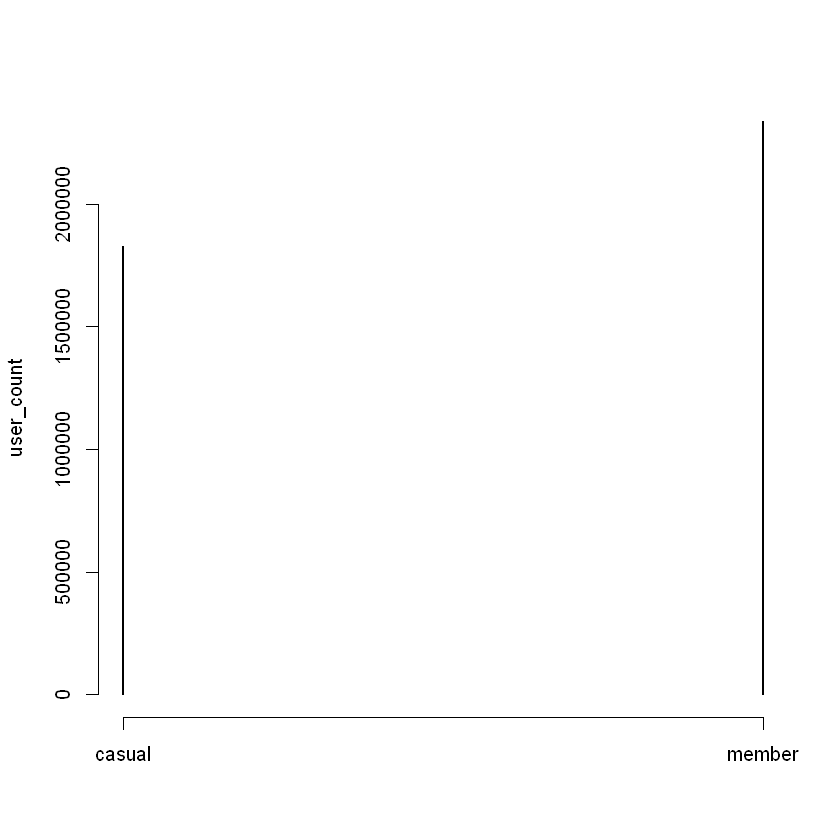

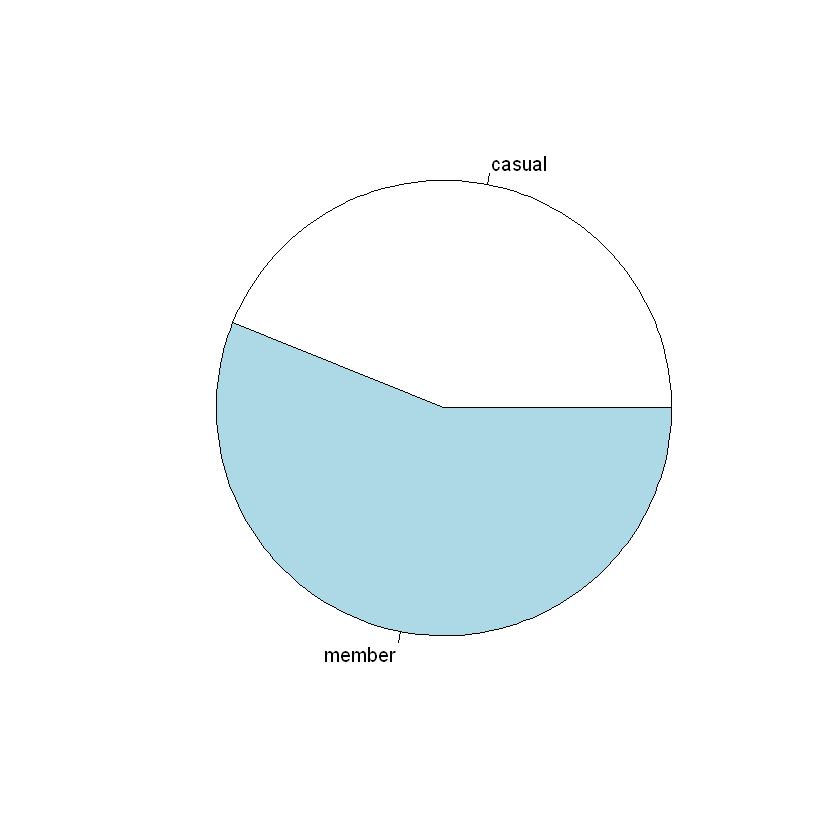

In [23]:
user_count <-table(cleaned_trip$user_status)
user_count
plot(user_count)
pie(user_count)

From the above analysis, it shows that we have more registered users than casual
users. 1828502 for casual users and 2338897 for registered users.  

Now, lets determine the average duration of each of the categories of riders

In [24]:
avg_trip_duration <- cleaned_trip %>% 
  group_by(user_status) %>% 
  summarize(avg = mean(trip_duration)/60)

avg_trip_duration 

user_status,avg
casual,36.64596
member,11.18397


From the above analysis, it is evident that the casual riders tend to ride
longer at an average of of 36.6 minutes/ride than the member/registered riders who ride for an average of 11.2 minutes/ride.  


Next, i will determine when majority of the riders prefer to ride by extracting
the aggregate count of days for each of the user_status

In [25]:
day_of_ride<- cleaned_trip %>% 
  group_by(weekday, user_status) %>% 
  select(user_status, weekday) %>% 
  summarize(number = table(weekday))

day_of_ride

weekday,user_status,number
Friday,casual,260362
Friday,member,344595
Monday,casual,198486
Monday,member,311776
Saturday,casual,434633
Saturday,member,352335
Sunday,casual,349935
Sunday,member,294362
Thursday,casual,197296
Thursday,member,338472


in order to extract the casual user with their corresponding weekday and number, i exported the outcome above to SQL.  I obtained the desired result by performing the command below;

SELECT * FROM day_of_ride WHERE user_status= "member"

SELECT * FROM day_of_ride WHERE user_status= "casual"



Then i imported the query result into Rstudio for futher analysis.

In [26]:
casual_ride <- read.csv("C:\\Users\\EDEH EMEKA NWEKE\\Desktop\\casual_ride_data.csv")
member_ride <-read.csv("C:\\Users\\EDEH EMEKA NWEKE\\Desktop\\member_ride_data.csv")

In [27]:
casual_ride

weekday,user_status,number
Friday,casual,260362
Monday,casual,198486
Saturday,casual,434633
Sunday,casual,349935
Thursday,casual,197296
Tuesday,casual,190303
Wednesday,casual,197487


In [28]:
member_ride

weekday,user_status,number
Friday,member,344595
Monday,member,311776
Saturday,member,352335
Sunday,member,294362
Thursday,member,338472
Tuesday,member,339835
Wednesday,member,357522


Then i sorted the above outcome in a descending order for clearer picture.

In [29]:
sort_casual_ride <- casual_ride %>% 
  arrange(number)

sort_casual_ride

weekday,user_status,number
Tuesday,casual,190303
Thursday,casual,197296
Wednesday,casual,197487
Monday,casual,198486
Friday,casual,260362
Sunday,casual,349935
Saturday,casual,434633


In [30]:
library('ggplot2')

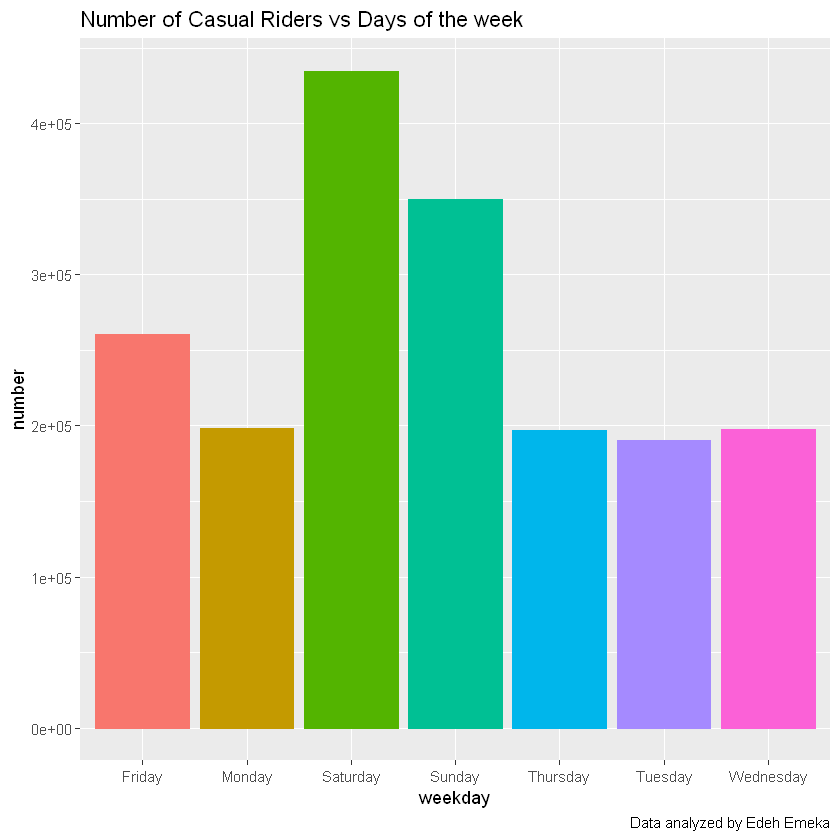

In [31]:
ggplot(sort_casual_ride, aes(x=weekday, y=number, color =weekday, fill= weekday)) + 
  labs(title = 'Number of Casual Riders vs Days of the week', 
       caption = 'Data analyzed by Edeh Emeka')+ 
  geom_bar(stat = "identity")+
  theme(legend.position="none")


In [32]:
sort_member_ride <- member_ride %>% 
  arrange(number)

sort_member_ride

weekday,user_status,number
Sunday,member,294362
Monday,member,311776
Thursday,member,338472
Tuesday,member,339835
Friday,member,344595
Saturday,member,352335
Wednesday,member,357522


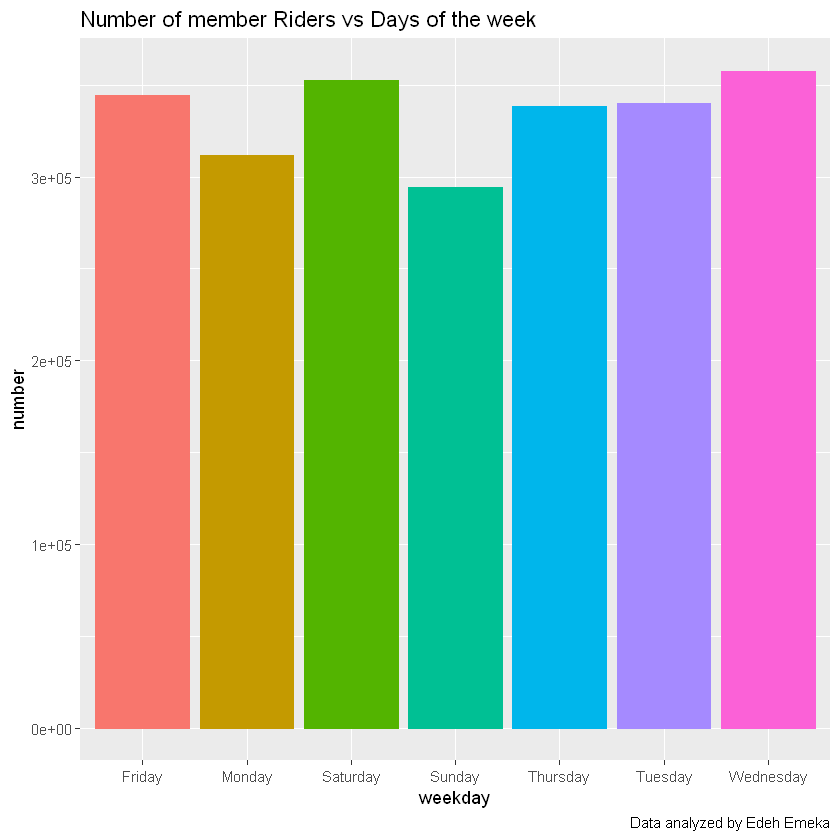

In [33]:
ggplot(sort_member_ride, aes(x=weekday, y=number, color =weekday, fill = weekday)) + 
  labs(title = 'Number of member Riders vs Days of the week', 
       caption = 'Data analyzed by Edeh Emeka')+ 
  geom_bar(stat = "identity")+
  theme(legend.position="none")

From the above graph, it is evident that majority of the casual riders, close to 60%, prefer riding over the weekend, Fridays, Saturdays and Sundays as against the member/registered riders that are almost evenly distributed across the weeks.
about 60% of casual trips take place over the weekend.  

In trying to extract the months of these rides, i ran the following codes,
exported the outcome to SQL in order to aggregate the user counts with their
respective months.

In [35]:
as_month<- cleaned_trip %>% 
  mutate(month=format(cleaned_trip$end_time, "%m"))
head(as_month)

ride_id,bike_type,start_time,end_time,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,user_status,trip_duration,weekday,month
6C992BD37A98A63F,classic_bike,2021-04-12 18:25:36,2021-04-12 18:56:55,State St & Pearson St,TA1307000061,Southport Ave & Waveland Ave,13235,41.89745,-87.62872,41.94815,-87.66394,member,1879s (~31.32 minutes),Monday,04
1E0145613A209000,docked_bike,2021-04-27 17:27:11,2021-04-27 18:31:29,Dorchester Ave & 49th St,KA1503000069,Dorchester Ave & 49th St,KA1503000069,41.80577,-87.59246,41.80577,-87.59246,casual,3858s (~1.07 hours),Tuesday,04
E498E15508A80BAD,docked_bike,2021-04-03 12:42:45,2021-04-07 11:40:24,Loomis Blvd & 84th St,20121,Loomis Blvd & 84th St,20121,41.74149,-87.65841,41.74149,-87.65841,casual,341859s (~3.96 days),Saturday,04
1887262AD101C604,classic_bike,2021-04-17 09:17:42,2021-04-17 09:42:48,Honore St & Division St,TA1305000034,Southport Ave & Waveland Ave,13235,41.90312,-87.67394,41.94815,-87.66394,member,1506s (~25.1 minutes),Saturday,04
C123548CAB2A32A5,docked_bike,2021-04-03 12:42:25,2021-04-03 14:13:42,Loomis Blvd & 84th St,20121,Loomis Blvd & 84th St,20121,41.74149,-87.65841,41.74149,-87.65841,casual,5477s (~1.52 hours),Saturday,04
097E76F3651B1AC1,classic_bike,2021-04-25 18:43:18,2021-04-25 18:43:59,Clinton St & Polk St,15542,Clinton St & Polk St,15542,41.87147,-87.64095,41.87147,-87.64095,casual,41s,Sunday,04


Since the month(number) is in character format, i have to convert it to a numeric format by running the code below.

In [36]:
month_as_num <- as_month %>% 
  mutate(month_num = as.numeric(as_month$month))

str(month_as_num)

Classes 'tbl_df', 'tbl' and 'data.frame':	4167399 obs. of  17 variables:
 $ ride_id           : chr  "6C992BD37A98A63F" "1E0145613A209000" "E498E15508A80BAD" "1887262AD101C604" ...
 $ bike_type         : chr  "classic_bike" "docked_bike" "docked_bike" "classic_bike" ...
 $ start_time        : POSIXct, format: "2021-04-12 18:25:36" "2021-04-27 17:27:11" ...
 $ end_time          : POSIXct, format: "2021-04-12 18:56:55" "2021-04-27 18:31:29" ...
 $ start_station_name: chr  "State St & Pearson St" "Dorchester Ave & 49th St" "Loomis Blvd & 84th St" "Honore St & Division St" ...
 $ start_station_id  : chr  "TA1307000061" "KA1503000069" "20121" "TA1305000034" ...
 $ end_station_name  : chr  "Southport Ave & Waveland Ave" "Dorchester Ave & 49th St" "Loomis Blvd & 84th St" "Southport Ave & Waveland Ave" ...
 $ end_station_id    : chr  "13235" "KA1503000069" "20121" "13235" ...
 $ start_lat         : num  41.9 41.8 41.7 41.9 41.7 ...
 $ start_lng         : num  -87.6 -87.6 -87.7 -87.7 -87.7 ...


I will convert the numeric month to month names by running the code below.

In [38]:
month_letter <- month_as_num %>% 
  mutate(month_l = month.name[month_as_num$month_num])
head(month_letter)

ride_id,bike_type,start_time,end_time,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,user_status,trip_duration,weekday,month,month_num,month_l
6C992BD37A98A63F,classic_bike,2021-04-12 18:25:36,2021-04-12 18:56:55,State St & Pearson St,TA1307000061,Southport Ave & Waveland Ave,13235,41.89745,-87.62872,41.94815,-87.66394,member,1879s (~31.32 minutes),Monday,04,4,April
1E0145613A209000,docked_bike,2021-04-27 17:27:11,2021-04-27 18:31:29,Dorchester Ave & 49th St,KA1503000069,Dorchester Ave & 49th St,KA1503000069,41.80577,-87.59246,41.80577,-87.59246,casual,3858s (~1.07 hours),Tuesday,04,4,April
E498E15508A80BAD,docked_bike,2021-04-03 12:42:45,2021-04-07 11:40:24,Loomis Blvd & 84th St,20121,Loomis Blvd & 84th St,20121,41.74149,-87.65841,41.74149,-87.65841,casual,341859s (~3.96 days),Saturday,04,4,April
1887262AD101C604,classic_bike,2021-04-17 09:17:42,2021-04-17 09:42:48,Honore St & Division St,TA1305000034,Southport Ave & Waveland Ave,13235,41.90312,-87.67394,41.94815,-87.66394,member,1506s (~25.1 minutes),Saturday,04,4,April
C123548CAB2A32A5,docked_bike,2021-04-03 12:42:25,2021-04-03 14:13:42,Loomis Blvd & 84th St,20121,Loomis Blvd & 84th St,20121,41.74149,-87.65841,41.74149,-87.65841,casual,5477s (~1.52 hours),Saturday,04,4,April
097E76F3651B1AC1,classic_bike,2021-04-25 18:43:18,2021-04-25 18:43:59,Clinton St & Polk St,15542,Clinton St & Polk St,15542,41.87147,-87.64095,41.87147,-87.64095,casual,41s,Sunday,04,4,April


In [40]:
month_of_ride<- month_letter %>% 
  group_by(month_l, user_status) %>% 
  summarize(number = table(month_l))

month_of_ride

month_l,user_status,number
April,casual,120375
April,member,177773
August,casual,283262
August,member,325550
December,casual,24489
December,member,89096
February,casual,8608
February,member,34383
January,casual,14698
January,member,68823


I will export the above outcome to a csv file for further analysis in SQL in order to aggregate the user counts with their corresponding months.  write.csv(month_of_ride, "month_of_ride.csv")

I will extract the data for the two different user types, casual and member, using the sql command below.

SELECT * FROM month_of_ride WHERE user_status = "member"

SELECT * FROM month_of_ride WHERE user_status = "casual"


Next, i will import and sort the results of the above commands in a descending order.


In [41]:
member_month <-read.csv("C:\\Users\\EDEH EMEKA NWEKE\\Desktop\\member_month_of_ride.csv")
casual_month <-read.csv("C:\\Users\\EDEH EMEKA NWEKE\\Desktop\\casual_month_of_ride.csv")

In [42]:
sort_member_month <- member_month %>% 
  arrange(number)

sort_member_month

month_l,user_status,number
February,member,34383
January,member,68823
December,member,89096
March,member,130040
November,member,150024
April,member,177773
October,member,216492
May,member,234179
September,member,285103
June,member,304566


In [43]:
sort_casual_month <- casual_month %>% 
  arrange(number)

sort_casual_month

month_l,user_status,number
February,casual,8608
January,casual,14698
December,casual,24489
November,casual,73130
March,casual,75633
April,casual,120375
October,casual,122821
September,casual,215379
May,casual,216745
August,casual,283262


I will further present the above results graphically for clearer picture.

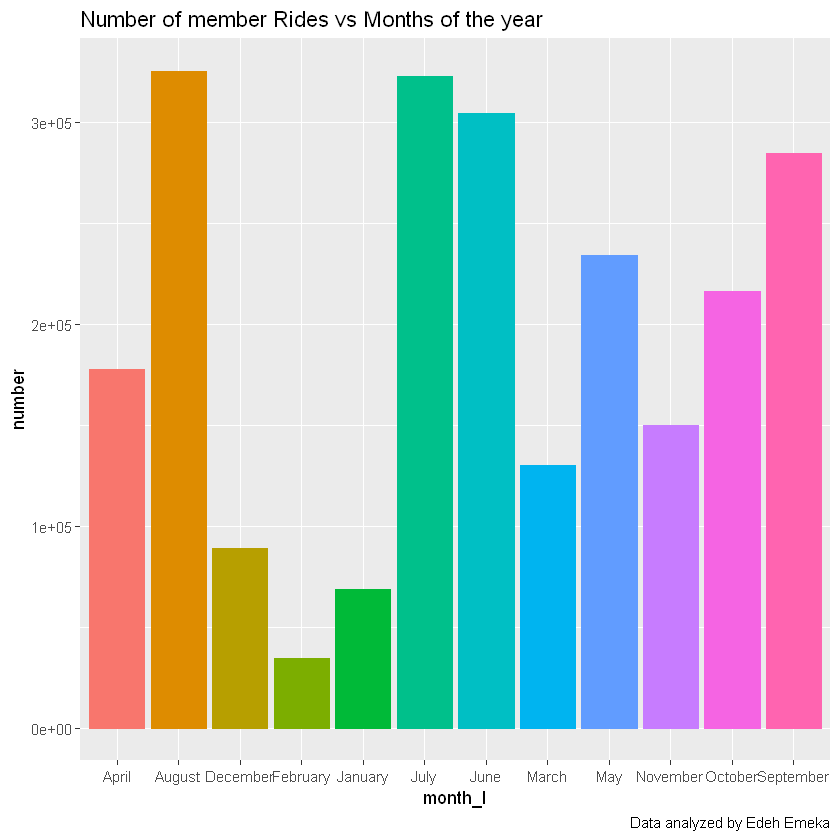

In [44]:
ggplot(sort_member_month, aes(x=month_l, y=number, color =month_l, fill = month_l)) + 
  labs(title = 'Number of member Rides vs Months of the year', 
       caption = 'Data analyzed by Edeh Emeka')+ 
  geom_bar(stat = "identity")+
  theme(legend.position="none")

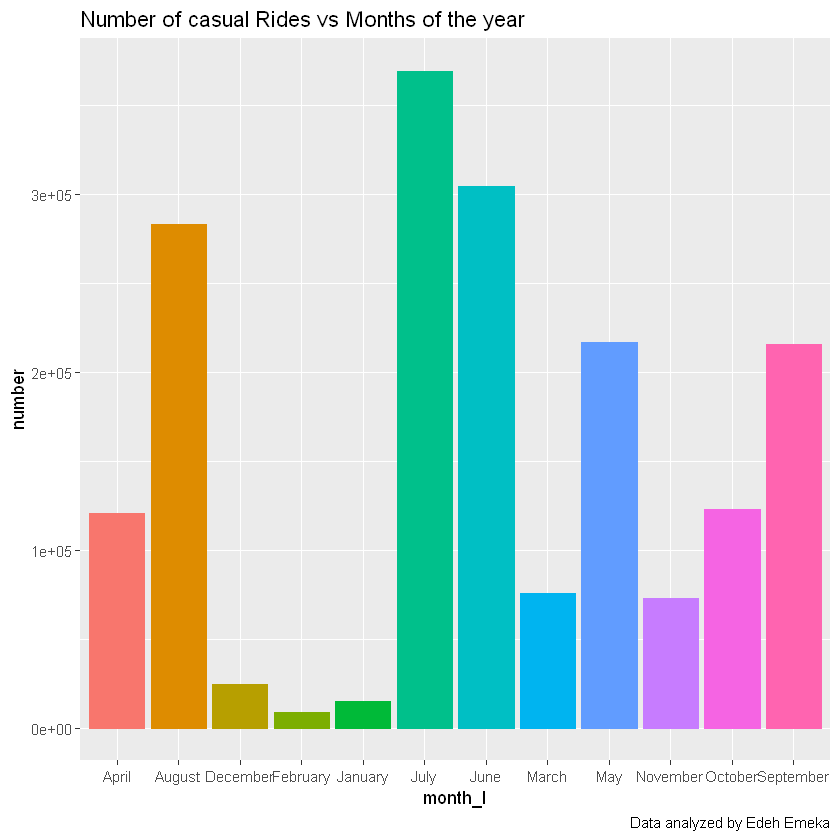

In [45]:
ggplot(sort_casual_month, aes(x=month_l, y=number, color =month_l, fill = month_l)) + 
  labs(title = 'Number of casual Rides vs Months of the year', 
       caption = 'Data analyzed by Edeh Emeka')+ 
  geom_bar(stat = "identity")+
  theme(legend.position="none")

From the above graphs, it is evident that casual riders are mostly active in the summer months of June, July and August.

### ACT

Here are my three observations and recommendations in order to convert casual riders to annual riders.  

**Observations**  
1. Casual users are mostly active on weekends (Fridays, Saturdays and Sundays)as against annual/member users that are almost evenly active all through the week.  
2. on the average, Casual users tend to ride for about 25 minutes longer than the member/annual users.  
3. Casual users are mostly active during the summer months (June, July, August) while annual/member users are active in all the months bar winter months.  

**Recommendations**  
1. Offer membership exclusive incentives/packages for weekend rides.  
2. Offer discounted special summer packages to members.  
3. Offer special discounts for rides that last longer than 15 minutes.  



Edeh Emeka N.   
2021-08-26
  
    